# Dataset

In [39]:
import os
from PIL import Image
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plz


class MyDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, debug=False):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)
        self.debug = debug

        print('found', len(self.images))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        img_path = os.path.join(self.image_dir, self.images[index])
        mask_path = os.path.join(self.mask_dir, self.images[index])

#         if self.debug:
#             print('\tGetting these:\n\t', img_path, '\n\t', mask_path)

        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
#         print('Types:', type(image), image.mode, type(mask), mask.mode)

        image = self.transform(image)
        mask = self.transform(mask)
        # print('Types after transform:', type(image), type(mask))

#         print('\tShapes:', image.shape, mask.shape)

        # image = np.array(image)
        # mask = np.array(mask, dtype=np.float32)

        # mask[mask == 255.0] = 1.0
        
        # print('DEBUG:', self.images[index], image.shape, mask.shape)
        return image, mask

# Utils

In [40]:
from torch.utils.data import DataLoader


def get_loaders(
  train_dir,
  train_maskdir,
  val_dir,
  val_maskdir,
  batch_size,
  train_transform,
  val_transform,
  num_workers=0,
  pin_memory=True
):
    train_ds = MyDataset(
        image_dir=train_dir,
        mask_dir=train_maskdir,
        transform=train_transform,
        debug=True
    )

    train_loader = DataLoader(
        train_ds,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=pin_memory,
        shuffle=True
    )

    val_ds = MyDataset(
        image_dir=val_dir,
        mask_dir=val_maskdir,
        transform=val_transform,
        debug=True
    )

    val_loader = DataLoader(
        val_ds,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=pin_memory,
        shuffle=False
    )

    return train_loader, val_loader

In [41]:
def render_img(img):
# def visualize_n_pair(count, img, mask):

    img = img[0].permute((1, 2, 0))

    fig, ax = plz.subplots()
    ax.imshow(img)
    plz.show()
#     _, ax = plt.subplots(count+1, 2)

#     for i in range(count):

#         ax[i, 0].imshow(img)
#         ax[i, 1].imshow(mask)
#         ax[i, 0].axis('off')
#         ax[i, 1].axis('off')
#     plt.imshow(img)
#     plt.show()

In [42]:
import torchvision


def i_show(img, one_channel=False):
    if one_channel:
        plt.imshow(img, cmap="Greys")
    else:
        plt.imshow(img)

# Caller

found 352
found 4
Loaded 352 traning batches, 4 validation batches.


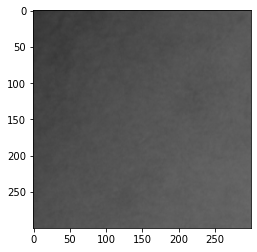

In [43]:
import torchvision.transforms as transforms


local = True
path_suffix = None

if local:
    path_suffix = '/home/leite/Drive/'
else:
    path_suffix = '/content/drive/MyDrive/'

t_dir = path_suffix + 'db/segmentation/FL5C/train/images/'
t_mask_dir = path_suffix + 'db/segmentation/FL5C/train/masks/'
v_dir = path_suffix + 'db/segmentation/FL5C/val/images/'
v_mask_dir = path_suffix + 'db/segmentation/FL5C/val/masks/'

batch = 1

t_transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    ])

v_transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    ])

t_loader, v_loader = get_loaders(
        t_dir,
        t_mask_dir,
        v_dir,
        v_mask_dir,
        batch,
        t_transform,
        v_transform)

print('Loaded {} traning batches, {} validation batches.'.format(t_loader.__len__(), v_loader.__len__()))

# print('Traning:')
# for i, data in enumerate(t_loader):
    # if i >= 1:
        # break

# print('Validating')
# for i, data in enumerate(v_loader):
    # if i >= 1:
        # break

t_dataiter = iter(t_loader)
v_dataiter = iter(v_loader)

img, label = t_dataiter.next()
v_img, v_label = v_dataiter.next()

# img_grid = torchvision.utils.make_grid(img)
# i_show(img_grid, one_channel=True)
render_img(img)